In [1]:
import pandas as pd
import numpy as np

index_names = ['unit_number', 'time_cycles']
setting_names = ['setting_1', 'setting_2', 'setting_3']
sensor_names = ['s_{}'.format(i+1) for i in range(0,21)]
col_names = index_names + setting_names + sensor_names

dftrain = pd.read_csv('./nasa-cmaps/versions/1/CMaps/train_FD001.txt',sep='\s+',header=None,index_col=False,names=col_names)
dftrain

,unit_number,time_cycles,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_12,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640


In [14]:
dftest = pd.read_csv('./nasa-cmaps/versions/1/CMaps/test_FD001.txt',sep='\s+',header=None,index_col=False,names=col_names)
dfrul = pd.read_csv('./nasa-cmaps/versions/1/CMaps/RUL_FD001.txt',sep='\s+',header=None,index_col=False,names=['RUL'])

In [5]:
for unit in dftrain['unit_number'].unique():
    dftrain['RUL'] = dftrain[dftrain['unit_number'] == unit]['time_cycles'].max() - dftrain['time_cycles']

In [15]:
features = ['s_2', 's_3', 's_4', 's_7', 's_9', 's_11', 's_12', 's_13', 's_14', 's_17', 's_20', 's_21']

In [19]:
train = dftrain[['unit_number', 'time_cycles'] + features + ['RUL']]
train.head()

,unit_number,time_cycles,s_2,s_3,s_4,s_7,s_9,s_11,s_12,s_13,s_14,s_17,s_20,s_21,RUL
0,1,1,641.82,1589.70,1400.60,554.36,9046.19,47.47,521.66,2388.02,8138.62,392,39.06,23.4190,199
1,1,2,642.15,1591.82,1403.14,553.75,9044.07,47.49,522.28,2388.07,8131.49,392,39.00,23.4236,198
2,1,3,642.35,1587.99,1404.20,554.26,9052.94,47.27,522.42,2388.03,8133.23,390,38.95,23.3442,197
3,1,4,642.35,1582.79,1401.87,554.45,9049.48,47.13,522.86,2388.08,8133.83,392,38.88,23.3739,196
4,1,5,642.37,1582.85,1406.22,554.00,9055.15,47.28,522.19,2388.04,8133.80,393,38.90,23.4044,195


In [17]:
test = dftest[['unit_number', 'time_cycles'] + features]
test

,unit_number,time_cycles,s_2,s_3,s_4,s_7,s_9,s_11,s_12,s_13,s_14,s_17,s_20,s_21
0,1,1,643.02,1585.29,1398.21,553.90,9050.17,47.20,521.72,2388.03,8125.55,392,38.86,23.3735
1,1,2,641.71,1588.45,1395.42,554.85,9054.42,47.50,522.16,2388.06,8139.62,393,39.02,23.3916
2,1,3,642.46,1586.94,1401.34,554.11,9056.96,47.50,521.97,2388.03,8130.10,393,39.08,23.4166
3,1,4,642.44,1584.12,1406.42,554.07,9045.29,47.28,521.38,2388.05,8132.90,391,39.00,23.3737
4,1,5,642.51,1587.19,1401.92,554.16,9044.55,47.31,522.15,2388.03,8129.54,390,38.99,23.4130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,643.24,1599.45,1415.79,553.41,9142.37,47.69,520.69,2388.00,8213.28,394,38.65,23.1974
13092,100,195,643.22,1595.69,1422.05,553.22,9140.68,47.60,521.05,2388.09,8210.85,395,38.57,23.2771
13093,100,196,643.44,1593.15,1406.82,553.04,9146.81,47.57,521.18,2388.04,8217.24,395,38.62,23.2051
13094,100,197,643.26,1594.99,1419.36,553.37,9148.85,47.61,521.33,2388.08,8220.48,395,38.66,23.2699


In [20]:
import numpy as np
import pandas as pd

import torch
import random
import torch.nn as nn

from sklearn.model_selection import TimeSeriesSplit

import matplotlib.pyplot as plt

In [24]:
from torch.utils.data import Dataset

# device 설정
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# 난수 시드 설정
def set_seed(seed_value=42):
    random.seed(seed_value)
    np.random.seed(seed_value)
    torch.manual_seed(seed_value)

    # CUDA 환경에 대한 시드 설정
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed_value)
        torch.cuda.manual_seed_all(seed_value)
        torch.backends.cudnn.deterministic = True
        torch.backends.cudnn.benchmark = False

# 시퀀스 데이터 생성 함수
# 유닛 별로 시퀀스 생성
class UnitWindowDataset(Dataset):
    """
    unit_number 별로 시퀀스(윈도우)를 생성.
    - df: unit_number, time_cycles, features[, RUL]
    - features: feature 리스트
    - seq_len: 윈도우 길이
    - stride: 슬라이딩 스텝
    - target_col: None이면 y는 None(또는 다음타임스텝 등으로 변경 가능)
    """
    def __init_(self, df, features, seq_len=40, stride=1, target_col='RUL'):
        self.features = features
        self.seq_len = seq_len
        self.X = []
        self.y = []
        for u, g in df.groupby('unit_number'):
            g = g.sort_values('time_cycles')
            arr = g[features].values.astype(np.float32)
            if target_col is not None and target_col in g.columns: # 타겟이 있으면
                targ = g[target_col].values.astype(np.float32)
            else:
                targ=None
            T = len(arr)
        if T < seq_len: # 데이터 길이가 시퀀스 길이보다 짧으면 패딩
            pad = np.repeat(arr[0:1], seq_len - T, axis=0) # 앞부분 패딩
            arr_p = np.vstack([pad, arr]) # 패딩 추가
            if targ is not None:
                targ = np.concatenate([np.repeat(targ[0], seq_len - T), targ])

            # 이제 T = seq_len
                T = seq_len
            else:
                arr_p = arr
            for end in range(self.seq_len - 1, T, stride):
                start = end - (self.seq_len - 1)
                self.X.append(arr_p[start:end+1])          # (seq_len, n_features)
                if targ is not None:
                    self.y.append(targ[end])               # 라벨: 윈도우 마지막 타임스텝의 값
        self.X = np.stack(self.X) if len(self.X) > 0 else np.empty((0, seq_len, len(features)), dtype=np.float32)
        self.y = np.array(self.y, dtype=np.float32) if len(self.y) > 0 else np.empty((0,), dtype=np.float32)

    def __len__(self):
        return len(self.y) if self.y.size else len(self.X)

    def __getitem__(self, idx):
        x = torch.from_numpy(self.X[idx])
        if self.y.size:
            y = torch.tensor(self.y[idx]).float()
            return x, y
        else:
            return x


# LSTM 모델 정의
class LSTMModel(nn.Module):
    # 생성자 함수
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTMModel, self).__init__()

        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    # 순전파 함수
    def forward(self, x):
        batch_size = x.size(0) # 배치 크기
        h0, c0 = self.init_hidden(batch_size, x.device)
        out, _ = self.lstm(x, (h0, c0)) # h0=초기 은닉 상태, c0=초기 셀 상태
        out = self.fc(out[:, -1, :]) # 마지막 타임스텝의 출력만 사용
        return out

    # 초기 은닉 상태와 셀 상태를 생성하는 함수
    def init_hidden(self, batch_size, device):
        h0 = torch.zeros(self.num_layers, batch_size, self.hidden_size).to(device)
        c0 = torch.zeros(self.num_layers, batch_size, self.hidden_size).to(device)
        return h0, c0
    
# 모델 학습 함수
def train(model, train_loader, criterion, optimizer):
    model.train() # 학습 모드로 전환
    total_loss = 0
    for data, target in train_loader:
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad() # 기울기 초기화
        output = model(data) # 모델 출력 계산
        loss = criterion(output, target) # 손실 계산
        loss.backward() # 역전파
        optimizer.step() # 가중치 업데이트
        total_loss += loss.item() # 손실 누적
    return total_loss / len(train_loader) # 평균 손실 반환
    
# 모델 평가 함수
def validate_model(model, test_loader, criterion):
    model.eval() # 평가 모드로 전환
    total_loss = 0
    actuals = []
    predictions = []

    with torch.no_grad(): # 기울기 계산 비활성화
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data) # 모델 출력 계산
            loss = criterion(output, target) # 손실 계산
            total_loss += loss.item() # 손실 누적

            # 예측값과 실제값을 리스트에 저장
            actuals.extend(target.cpu().numpy()) # 실제 값 저장
            predictions.extend(output.cpu().numpy()) # 예측 값 저장

    # 손실 계산
    avg_loss = total_loss / len(test_loader)

    return avg_loss, actuals, predictions

In [26]:
from sklearn.preprocessing import StandardScaler
from torch.utils.data import TensorDataset, DataLoader
import math

set_seed(42)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

def build_unit_windows(df, features, seq_len=50, stride=1, target_col='RUL'):
    Xs, ys = [], []
    for u, g in df.groupby('unit_number'):
        g = g.sort_values('time_cycles')
        arr = g[features].values.astype(np.float32)
        targ = g[target_col].values.astype(np.float32) if target_col in g.columns else None
        T = len(arr)
        if T < seq_len:
            pad = np.repeat(arr[0:1], seq_len - T, axis=0)
            arr_p = np.vstack([pad, arr])
            if targ is not None:
                targ = np.concatenate([np.repeat(targ[0], seq_len - T), targ])
            T = seq_len
        else:
            arr_p = arr
        for end in range(seq_len - 1, T, stride):
            start = end - (seq_len - 1)
            Xs.append(arr_p[start:end+1])
            if targ is not None:
                ys.append(targ[end])
    X = np.stack(Xs) if len(Xs) else np.empty((0, seq_len, len(features)), dtype=np.float32)
    y = np.array(ys, dtype=np.float32) if len(ys) else np.empty((0,), dtype=np.float32)
    return X, y

# 스케일러: train 전체로 fit -> 동일 transform 적용
scaler = StandardScaler()
# use the dataframe variable 'dftrain' (not the 'train' function) to avoid name collision
scaler.fit(dftrain[features].values)
train_scaled = dftrain.copy()
test_scaled = test.copy()
train_scaled[features] = scaler.transform(dftrain[features].values)
test_scaled[features] = scaler.transform(test[features].values)

# 유닛 단위로 train/val 분리 (유출 방지)
units = np.unique(train_scaled['unit_number'])
rng = np.random.default_rng(42)
rng.shuffle(units)
n_train_units = int(len(units)*0.8)
train_units = units[:n_train_units]
val_units = units[n_train_units:]

train_df_units = train_scaled[train_scaled.unit_number.isin(train_units)]
val_df_units = train_scaled[train_scaled.unit_number.isin(val_units)]

seq_len = 50
X_train, y_train = build_unit_windows(train_df_units, features, seq_len=seq_len, stride=1, target_col='RUL')
X_val, y_val = build_unit_windows(val_df_units, features, seq_len=seq_len, stride=1, target_col='RUL')

if X_train.size == 0:
    raise RuntimeError("Train windows empty — seq_len 확인")

# TensorDataset / DataLoader
tX = torch.from_numpy(X_train).float()
ty = torch.from_numpy(y_train).float().unsqueeze(1)
vX = torch.from_numpy(X_val).float()
vy = torch.from_numpy(y_val).float().unsqueeze(1)

train_ds = TensorDataset(tX, ty)
val_ds = TensorDataset(vX, vy)
train_loader = DataLoader(train_ds, batch_size=64, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=64, shuffle=False)

# 모델/옵티마이저/손실
model = LSTMModel(input_size=len(features), hidden_size=128, num_layers=2, output_size=1).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

# 학습 루프 (간단)
best_val = math.inf
for epoch in range(1, 21):
    train_loss = train(model, train_loader, criterion, optimizer)
    val_loss, _, _ = validate_model(model, val_loader, criterion)
    print(f"Epoch {epoch:02d} | Train loss: {train_loss:.4f} | Val loss: {val_loss:.4f}")
    if val_loss < best_val:
        best_val = val_loss
        torch.save(model.state_dict(), "best_model.pth")
        print("Saved best_model.pth")

# 테스트: 각 유닛의 마지막 윈도우로 예측
model.load_state_dict(torch.load("best_model.pth", map_location=device))
model.eval()
preds, units_pred = [], []
for u, g in test_scaled.groupby('unit_number'):
    g = g.sort_values('time_cycles')
    arr = g[features].values.astype(np.float32)
    T = len(arr)
    if T >= seq_len:
        window = arr[-seq_len:]
    else:
        pad = np.repeat(arr[0:1], seq_len - T, axis=0)
        window = np.vstack([pad, arr])
    x = torch.from_numpy(window).unsqueeze(0).float().to(device)  # (1, seq_len, n_features)
    with torch.no_grad():
        out = model(x)  # (1,1)
    val = out.cpu().numpy().reshape(-1)[0]
    preds.append(val)
    units_pred.append(u)

results = pd.DataFrame({'unit_number': units_pred, 'pred_RUL': preds}).sort_values('unit_number').reset_index(drop=True)
rul_idx = dfrul.reset_index(drop=True).copy()
rul_idx['unit_number'] = np.arange(1, len(rul_idx) + 1)
merged = pd.merge(rul_idx, results, on='unit_number', how='left')
rmse = np.sqrt(((merged['RUL'] - merged['pred_RUL'])**2).mean())
print(merged.head())
print(f"Test RMSE (per-unit final window): {rmse:.4f}")

Epoch 01 | Train loss: 5632.5667 | Val loss: 4634.5559
Saved best_model.pth
Epoch 02 | Train loss: 3720.9419 | Val loss: 3047.3704
Saved best_model.pth
Epoch 03 | Train loss: 2738.5389 | Val loss: 2431.2613
Saved best_model.pth
Epoch 04 | Train loss: 2289.2625 | Val loss: 1764.6441
Saved best_model.pth
Epoch 05 | Train loss: 1809.8369 | Val loss: 1612.3242
Saved best_model.pth
Epoch 06 | Train loss: 1617.0775 | Val loss: 1414.3801
Saved best_model.pth
Epoch 07 | Train loss: 1490.3024 | Val loss: 1448.2350
Epoch 08 | Train loss: 1411.2464 | Val loss: 1268.2132
Saved best_model.pth
Epoch 09 | Train loss: 1326.7760 | Val loss: 1345.0986
Epoch 10 | Train loss: 1307.6160 | Val loss: 1509.9366
Epoch 11 | Train loss: 1244.7241 | Val loss: 1495.9616
Epoch 12 | Train loss: 1210.6255 | Val loss: 1294.4021
Epoch 13 | Train loss: 1093.5746 | Val loss: 1847.3334
Epoch 14 | Train loss: 902.0848 | Val loss: 2179.5972
Epoch 15 | Train loss: 782.4201 | Val loss: 2009.2031
Epoch 16 | Train loss: 640.578

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19408\198508604.py:87: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("best_model.pth", map_locati

   RUL  unit_number    pred_RUL
0  112            1  101.635979
1   98            2  101.598511
2   69            3   71.215019
3   82            4  100.140282
4   91            5  101.193535
Test RMSE (per-unit final window): 26.6451


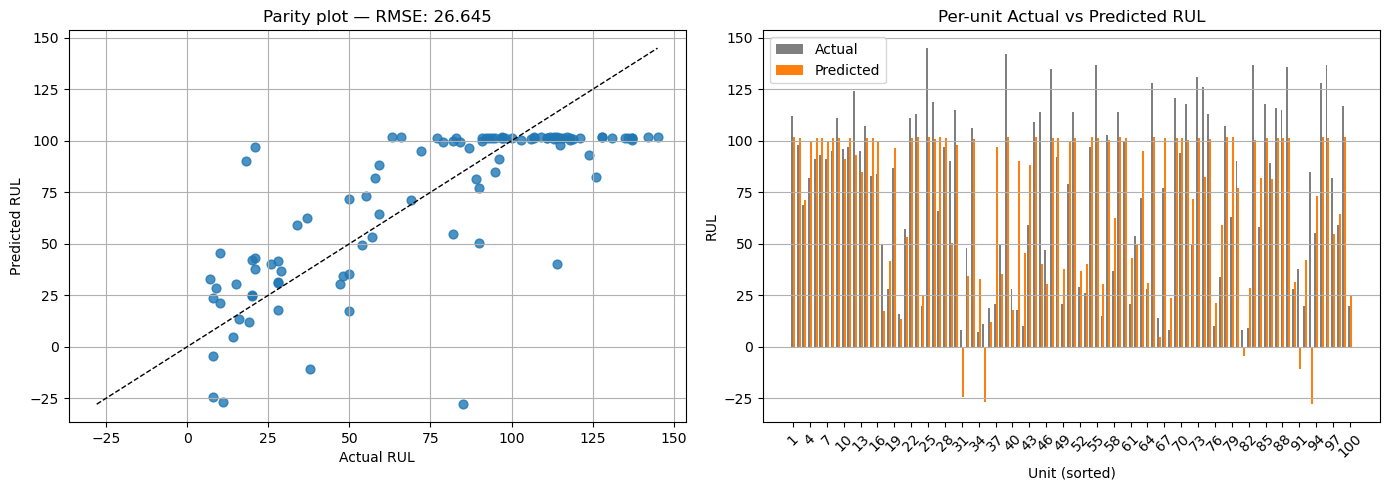

Top 5 units by absolute error:
    unit_number  RUL   pred_RUL     abs_err
92           93   85 -27.885490  112.885490
36           37   21  97.138008   76.138008
44           45  114  40.047672   73.952328
40           41   18  90.148582   72.148582
90           91   38 -10.604683   48.604683


In [27]:
# ...existing code...
import matplotlib.pyplot as plt
import numpy as np

df_plot = merged.dropna().sort_values('unit_number').copy()  # merged는 이전 셀에서 생성된 결과
rmse = np.sqrt(((df_plot['RUL'] - df_plot['pred_RUL'])**2).mean())

fig, axs = plt.subplots(1, 2, figsize=(14,5))

# 1) Parity scatter (actual vs pred)
axs[0].scatter(df_plot['RUL'], df_plot['pred_RUL'], color='tab:blue', s=40, alpha=0.8)
minv = min(df_plot[['RUL','pred_RUL']].min())
maxv = max(df_plot[['RUL','pred_RUL']].max())
axs[0].plot([minv, maxv], [minv, maxv], 'k--', linewidth=1)  # identity line
axs[0].set_xlabel('Actual RUL')
axs[0].set_ylabel('Predicted RUL')
axs[0].set_title(f'Parity plot — RMSE: {rmse:.3f}')
axs[0].grid(True)

# 2) Per-unit bar (actual vs predicted)
x = np.arange(len(df_plot))
width = 0.35
axs[1].bar(x - width/2, df_plot['RUL'], width, label='Actual', color='tab:gray')
axs[1].bar(x + width/2, df_plot['pred_RUL'], width, label='Predicted', color='tab:orange')
axs[1].set_xlabel('Unit (sorted)')
axs[1].set_ylabel('RUL')
axs[1].set_title('Per-unit Actual vs Predicted RUL')
axs[1].legend()
# reduce x ticks if many units
if len(x) > 30:
    axs[1].set_xticks(x[::len(x)//30])
    axs[1].set_xticklabels(df_plot['unit_number'].iloc[::len(x)//30].astype(int), rotation=45)
else:
    axs[1].set_xticks(x)
    axs[1].set_xticklabels(df_plot['unit_number'].astype(int), rotation=45)
axs[1].grid(axis='y')

plt.tight_layout()
plt.show()

# (선택) 오차 상위 몇개 유닛 출력
df_plot['abs_err'] = (df_plot['RUL'] - df_plot['pred_RUL']).abs()
print("Top 5 units by absolute error:")
print(df_plot.sort_values('abs_err', ascending=False).head(5)[['unit_number','RUL','pred_RUL','abs_err']])
# ...existing code...